In [1]:
## project 1 
## Lawrence Liu


In [2]:
## need to import the necessary libraries

import pandas as pd # data frame to store the data

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split # train_test_split is used to split the data into a train and test set
from sklearn.metrics import mean_squared_error, r2_score # for evaluation metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor


import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting pairs plot

import numpy as np # many mathematical operations and more, used for sqrt()

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [3]:
## load the data
df = pd.read_csv('ToyotaCorolla.csv')
df.shape

(1436, 39)

In [4]:

len(df['Model'].unique())


319

In [5]:
## data preprocessing steps 

df.dropna(inplace = True) # this drops any missing values in the data set 
df['Fuel_Type'] = pd.Categorical(df['Fuel_Type'])
df = pd.get_dummies(df, columns = ['Fuel_Type'], drop_first = True)
df['Model'] = pd.Categorical(df["Model"])
df = pd.get_dummies(df , columns= ['Model'], drop_first = True)
df['Color'] = pd.Categorical(df["Color"])
df = pd.get_dummies(df , columns= ['Color'], drop_first = True)
x = df.dtypes
with pd.option_context('display.max_rows', None):
    print(x)


Id                                                                                   int64
Price                                                                                int64
Age_08_04                                                                            int64
Mfg_Month                                                                            int64
Mfg_Year                                                                             int64
KM                                                                                   int64
HP                                                                                   int64
Met_Color                                                                            int64
Automatic                                                                            int64
CC                                                                                   int64
Doors                                                                                int64

In [6]:
## after feature analysis , columns that were once that were objects have been coverted to categorical (they are now boolean columns)
## since booleans are T/F values , convert them to integers 1/0. 
## to do this , we can loop through the boolean columsns and convert them to integers
for col in df.select_dtypes(['bool']).columns:
    df[col] = df[col].astype(int)

In [7]:
## check the data types again (need to increase the context with pd.option_context to see all the rows)
x = df.dtypes
with pd.option_context('display.max_rows', None):
    print(x)

Id                                                                                   int64
Price                                                                                int64
Age_08_04                                                                            int64
Mfg_Month                                                                            int64
Mfg_Year                                                                             int64
KM                                                                                   int64
HP                                                                                   int64
Met_Color                                                                            int64
Automatic                                                                            int64
CC                                                                                   int64
Doors                                                                                int64

In [8]:
## check the df shape 
print(df.shape)

(1436, 365)


In [9]:
## Create training and testing datasets 
## Ensure that a 60% training dataset and 40% testing dataset is created
train_data , test_data = train_test_split ( df, test_size= 0.4 , random_state = 8)
## visualize summary statistics of the training dataset 
train_data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Model_TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,...,861.0,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,736.399535,10549.879210,56.652729,5.573751,1999.564460,68924.329849,100.894309,0.693380,0.058072,1566.033682,...,0.0,0.131243,0.196283,0.162602,0.205575,0.198606,0.081301,0.002323,0.019744,0.002323
std,415.695694,3431.519667,18.234683,3.368211,1.503358,37036.077891,14.265236,0.461358,0.234016,191.466956,...,0.0,0.337862,0.397416,0.369216,0.404356,0.399183,0.273455,0.048168,0.139202,0.048168
min,2.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,380.000000,8400.000000,44.000000,3.000000,1998.000000,43426.000000,86.000000,0.000000,0.000000,1400.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,738.000000,9750.000000,61.000000,5.000000,1999.000000,64000.000000,110.000000,1.000000,0.000000,1600.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1103.000000,11695.000000,70.000000,8.000000,2001.000000,88667.000000,110.000000,1.000000,0.000000,1600.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1442.000000,24990.000000,80.000000,12.000000,2004.000000,232940.000000,192.000000,1.000000,1.000000,2000.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


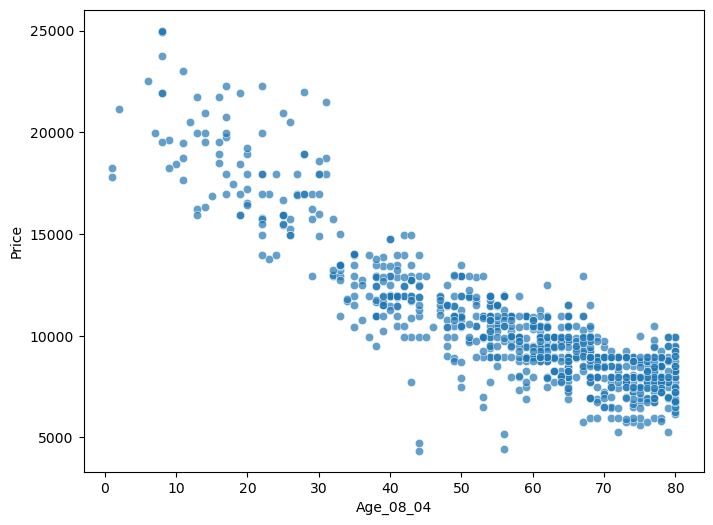

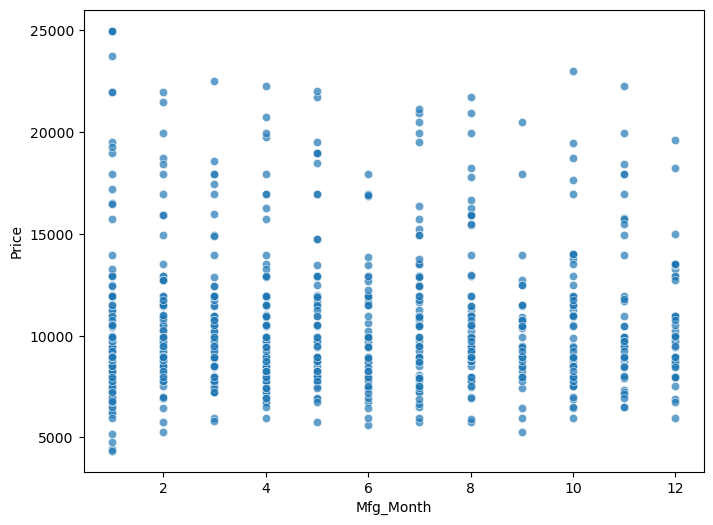

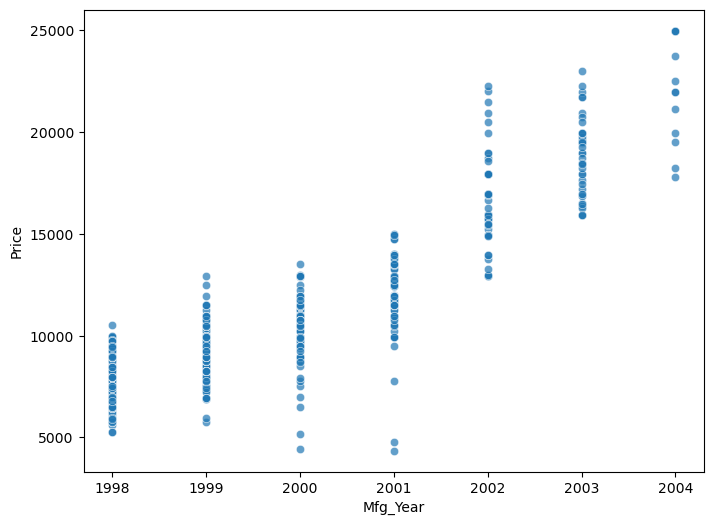

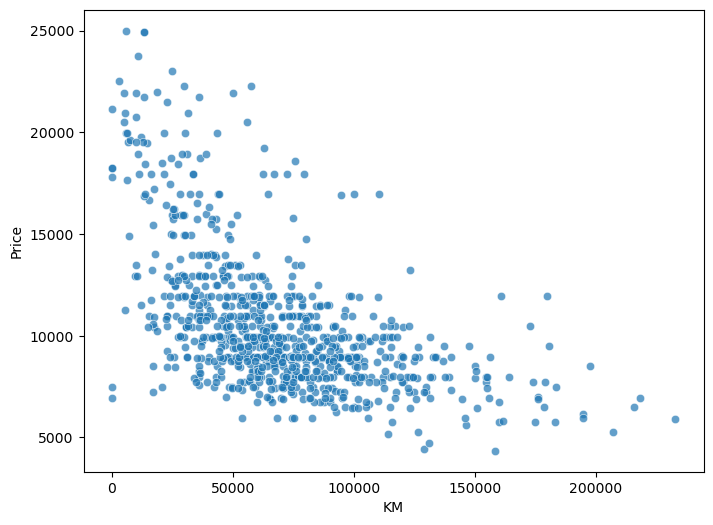

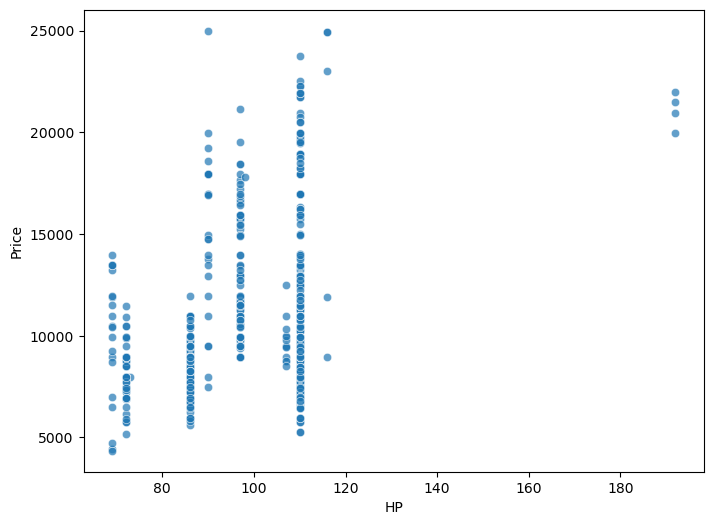

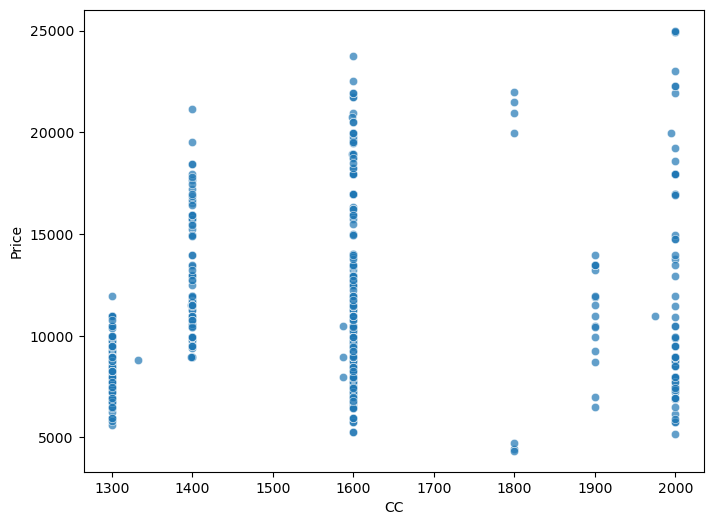

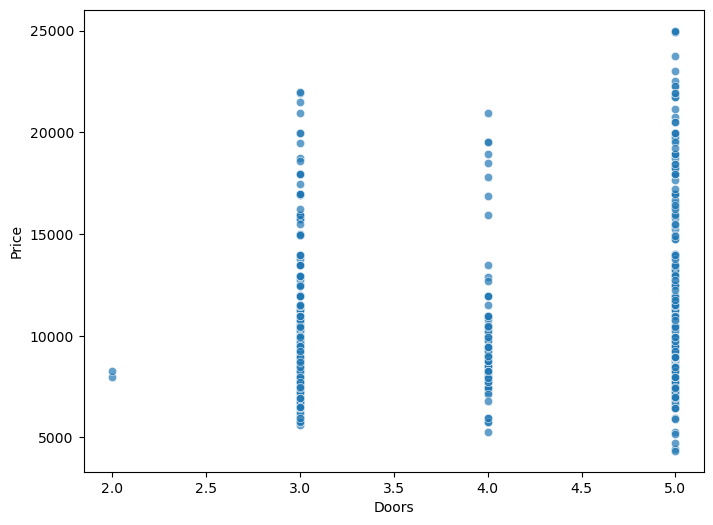

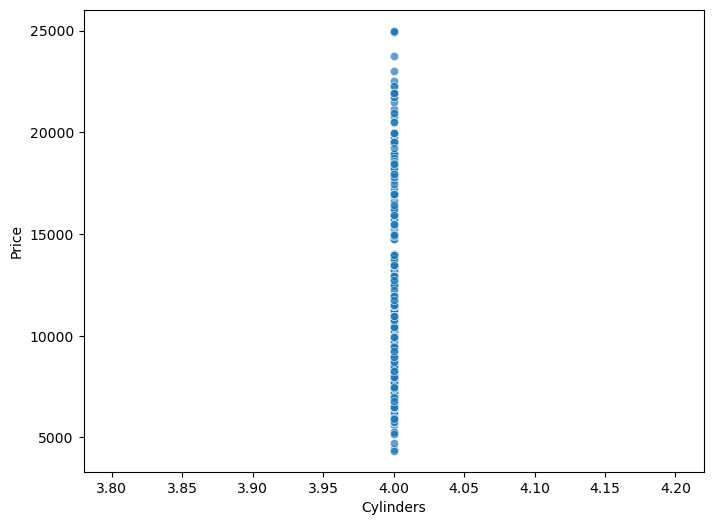

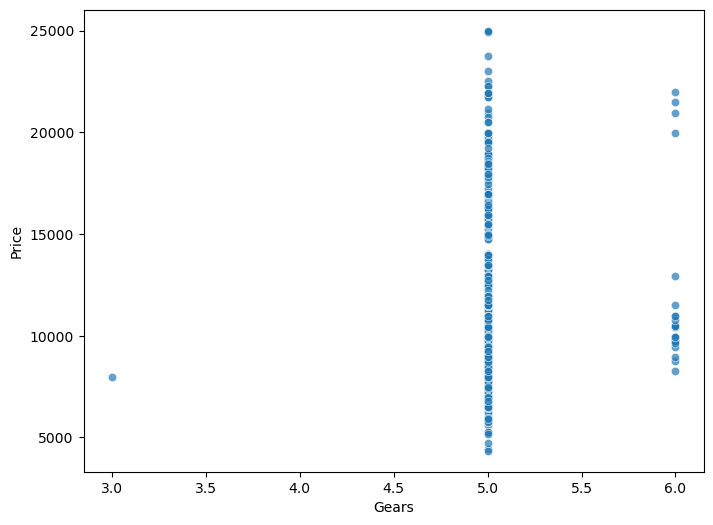

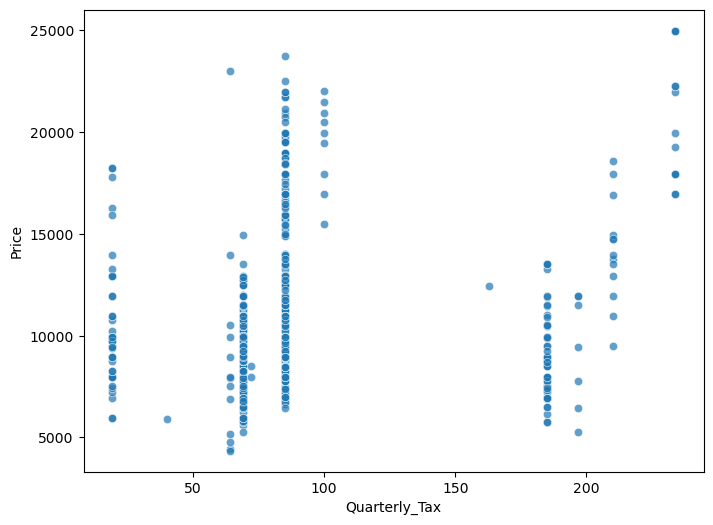

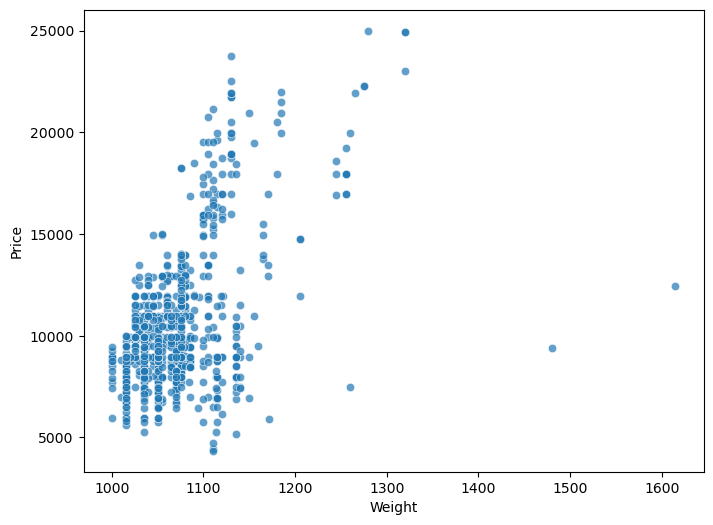

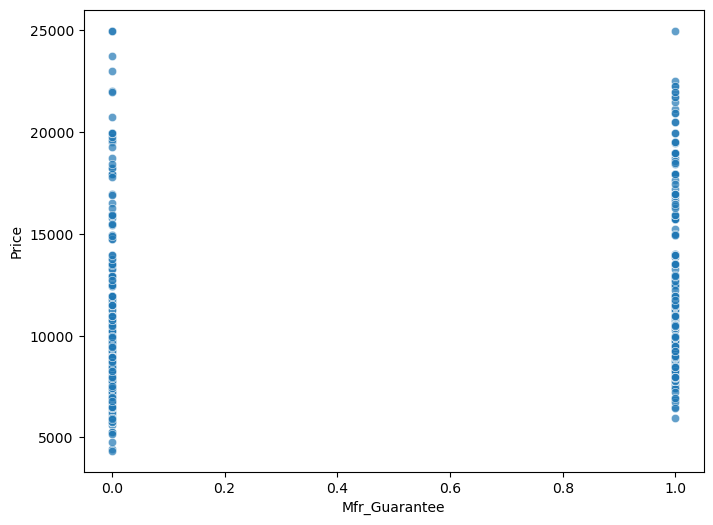

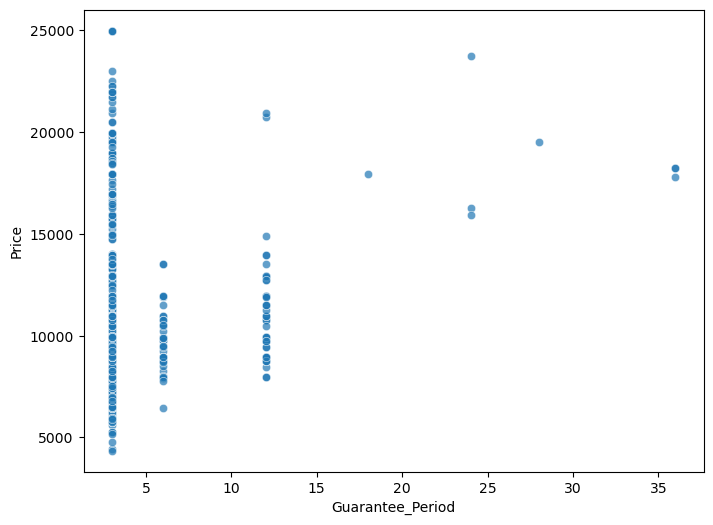

In [10]:
## lets visualize the data, for now excluding the binary variables

first_test_features = ['Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee','Guarantee_Period']

## create scatter plots to visualize the data
for i in first_test_features:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=train_data[i], y=train_data['Price'], alpha=0.7)
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.show()

## based on this it was determined that linearly the best variables to test are Age_08_04, Mfg_Year 
## influential variables in HP, CC, Guarentee Period 
## relationship of KM looks like 1/x 

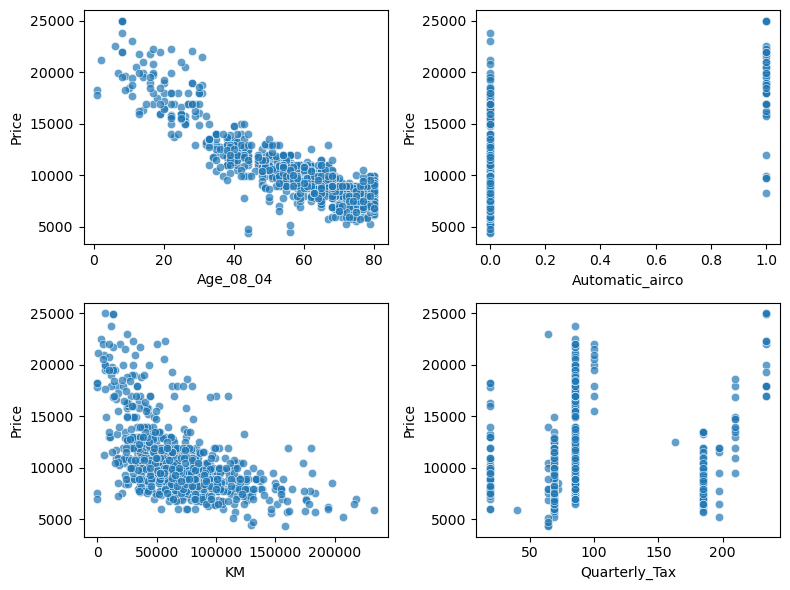

In [18]:
features_4by4 = ['Age_08_04', 'Automatic_airco', 'KM', 'Quarterly_Tax']
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

for i in range(4):
    sns.scatterplot(x = train_data[features_4by4[i]], y = train_data['Price'], alpha=0.7, ax=axes[i])
    axes[i].set_xlabel(features_4by4[i])
    axes[i].set_ylabel('Price')
plt.tight_layout()
plt.show()


C:\Users\liula\AppData\Local\Temp\ipykernel_14848\3488256282.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data['log_KM'] = np.log(train_data['KM'].replace(0,1))


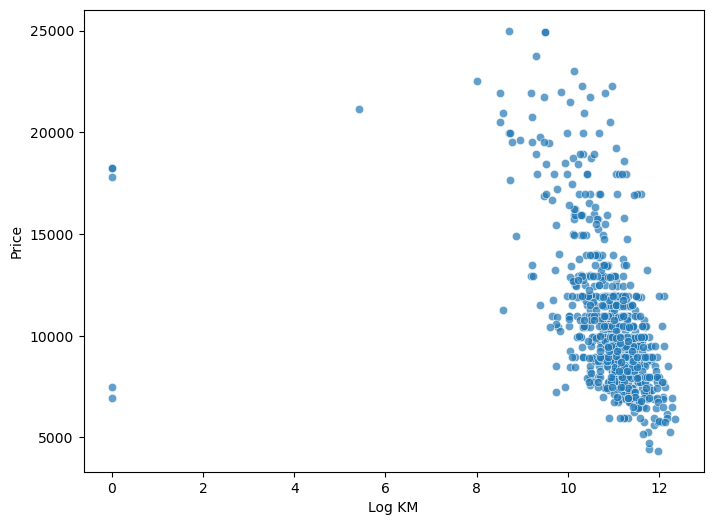

In [19]:
train_data['log_KM'] = np.log(train_data['KM'].replace(0,1))
plt.figure(figsize=(8,6))
sns.scatterplot(x=train_data['log_KM'], y= train_data['Price'], alpha = 0.7)
plt.xlabel('Log KM')
plt.ylabel('Price')
plt.show()

## not the best approximatation

In [11]:
## Test the Multicolinearity via a VIF and residual plots 

# -------------------------------------------------------------------
# Helper function for VIF
# -------------------------------------------------------------------

# This function takes your fitted model as input
# It iterates across all variables
# And it produces a pandas data frame of VIFs for each variable
def vif_table(model):
    X = model.model.exog
    names = model.model.exog_names
    vif_values = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return pd.DataFrame({"variable": names, "VIF": vif_values})

In [12]:
## create the prediction set that is needed for the 
predictors = ['Age_08_04', 'KM', 'CC', 'Fuel_Type_Petrol' , 'Fuel_Type_Diesel', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
               'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']

X_train = train_data[predictors].copy()
y_train = train_data['Price'].copy()
X_test = test_data[predictors].copy()
y_test = test_data['Price'].copy()

X_train

,Age_08_04,KM,CC,Fuel_Type_Petrol,Fuel_Type_Diesel,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar
1018,57,35000,1300,1,0,86,0,5,69,1,3,1,0,0,1,1,0
1205,75,87613,1300,1,0,86,0,3,69,0,3,0,0,0,0,1,0
783,65,76155,1600,1,0,110,0,4,69,0,3,0,0,0,0,0,1
392,49,131364,1600,1,0,110,0,5,85,0,3,0,0,0,1,0,0
380,53,176000,1900,0,1,69,0,3,185,0,3,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,63,44944,1600,1,0,110,0,4,69,0,3,1,0,0,1,0,1
133,13,29371,1600,1,0,110,0,4,19,0,24,1,0,1,1,0,0
361,35,24011,1400,1,0,97,0,3,69,1,3,0,0,0,0,0,0
1364,74,58454,1300,1,0,86,0,3,69,0,3,0,0,0,1,1,1


In [17]:
## Goal Create a multiple linear regression with price as the outcome variable 
## run the muliple linear regression model 

model_multiple_reg_v1 = LinearRegression().fit(X_train , y_train)
## want to create a table of coefficients for each predictor variable 
coef_table = pd.DataFrame({
    "Variable": ["Intercept"] + list(X_train.columns),
    "Coefficient": [model_multiple_reg_v1.intercept_] + list(model_multiple_reg_v1.coef_)
})

coef_table

,Variable,Coefficient
0,Intercept,11175.962924
1,Age_08_04,-104.430647
2,KM,-0.016713
3,CC,-2.761234
4,Fuel_Type_Petrol,2094.575620
5,Fuel_Type_Diesel,4005.552730
6,HP,52.510217
7,Automatic,568.705929
8,Doors,188.663241
9,Quarterly_Tax,14.686456


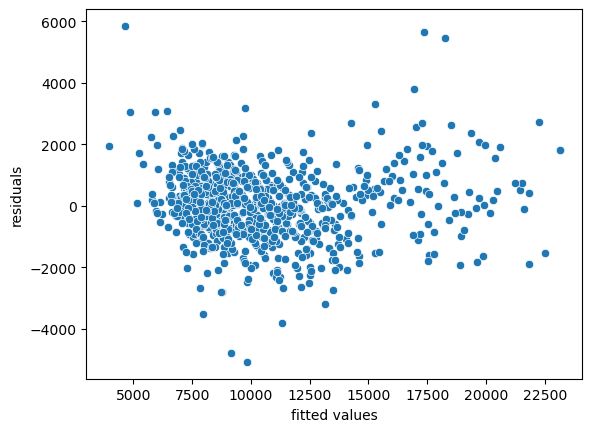

In [14]:
## need to check for obvious model misspecifications by plotting residuals 
## first need to create the residuals 
y_pred_v1 = model_multiple_reg_v1.predict(X_train)
residuals = y_train - y_pred_v1


## plot the residuals to test if there are obvious model misspecifications 
sns.scatterplot(x=y_pred_v1, y = residuals)
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show()

In [15]:
## check the three or four most important car specifications for predicting the car's price 
## fit OLS model with statsmodel to get p-values 
model_best_four_v1 = sm.OLS(y_train , sm.add_constant(X_train)).fit()

## update the coef_table to include p-values from the OLS model 
coef_table['p-Value']= model_best_four_v1.pvalues.values
## now that we have updated the coef_table with the p-values we need to remove index 0 containing the intercept
top_four_v1 = coef_table.drop(index = 0)
## now that the intercept is removed we can sort the table by p values in ascending order to get the 3 to 4 more important values 
top_four_v1 = top_four_v1.sort_values(by = 'p-Value' , ascending=True).head(4)
top_four_v1

,Variable,Coefficient,p-Value
1,Age_08_04,-104.430647,2.540687e-139
13,Automatic_airco,2786.604848,1.599164e-38
2,KM,-0.016713,8.437574e-28
9,Quarterly_Tax,14.686456,8.599628e-15


In [16]:
## based on the p-Values of the model specified by the multiple regression, the most influential variables are the Age_08_04, Automatic_airco,
## KM , and Quartlery_Tax variables 

## after referenceing the scatter plots earlier, it can be confirmed that Age_08_04 and KM makes sense (possible negative linear relationship)
## Automatic Air_co was a a Y/N (0/1) not plotted 
## Quarterly_Tax was not a good varialbe per the scatter plots 

## VIF testing will be done to test the presence of multicollinearity

In [19]:
## first step is to show the OLS regression Summary
vif_testing = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(vif_testing.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     415.4
Date:                Mon, 10 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:29:01   Log-Likelihood:                -7266.8
No. Observations:                 861   AIC:                         1.457e+04
Df Residuals:                     843   BIC:                         1.466e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.118e+04    740.078  

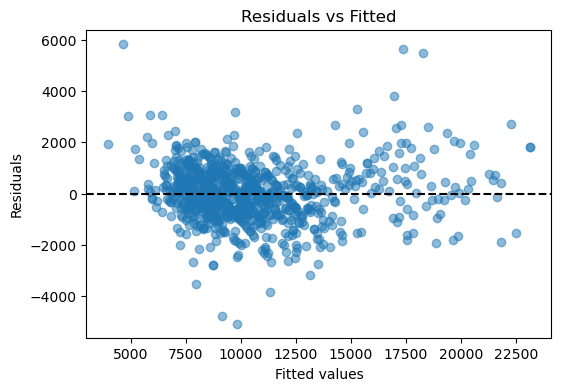

In [20]:
## per summary table: there is a possible indcation that there is a strong multicolinearity or other numerical problems 
# -------------------------------------------------------------------
# Diagnostic plots
# -------------------------------------------------------------------
# Rough analog to plot(f1) – residuals vs fitted and QQ-plot
plt.figure(figsize=(6, 4))
plt.scatter(vif_testing.fittedvalues, vif_testing.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

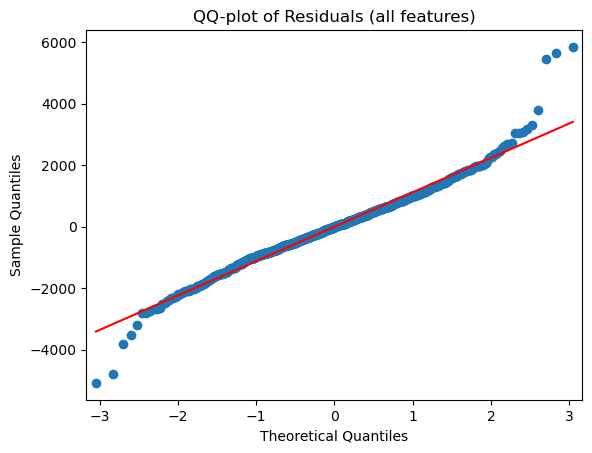


VIF for full model (all features):
            variable         VIF
0              const  368.147332
1          Age_08_04    2.588619
2                 KM    2.003528
3                 CC   10.973711
4   Fuel_Type_Petrol   13.497622
5   Fuel_Type_Diesel   25.497734
6                 HP    6.923321
7          Automatic    1.040343
8              Doors    1.133162
9      Quarterly_Tax    3.891659
10     Mfr_Guarantee    1.143593
11  Guarantee_Period    1.215019
12             Airco    1.723555
13   Automatic_airco    1.443510
14         CD_Player    1.410198
15   Powered_Windows    1.532145
16       Sport_Model    1.174458
17           Tow_Bar    1.077261


In [22]:
# QQ plot to assess normality
sm.qqplot(vif_testing.resid, line="s")
plt.title("QQ-plot of Residuals (all features)")
plt.show()

# VIF for full model
print("\nVIF for full model (all features):")
print(vif_table(vif_testing))

In [23]:
## per VIF table , Variables that are suspect : Fuel_Type_Petrol and Fuel_Type_Diesel , CC , HP 
## let us test the model after removing these 
predictors_test = ['Age_08_04', 'KM', 'Automatic', 'Doors', 'Quarterly_Tax','Mfr_Guarantee', 'Guarantee_Period', 
                   'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']

X_train_v2 = train_data[predictors_test].copy()
y_train_v2 = train_data['Price'].copy()
X_test_v2 = test_data[predictors_test].copy()
y_test_v2 = test_data['Price'].copy()

X_train_v2

,Age_08_04,KM,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar
1018,57,35000,0,5,69,1,3,1,0,0,1,1,0
1205,75,87613,0,3,69,0,3,0,0,0,0,1,0
783,65,76155,0,4,69,0,3,0,0,0,0,0,1
392,49,131364,0,5,85,0,3,0,0,0,1,0,0
380,53,176000,0,3,185,0,3,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,63,44944,0,4,69,0,3,1,0,0,1,0,1
133,13,29371,0,4,19,0,24,1,0,1,1,0,0
361,35,24011,0,3,69,1,3,0,0,0,0,0,0
1364,74,58454,0,3,69,0,3,0,0,0,1,1,1


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     478.7
Date:                Mon, 10 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:29:45   Log-Likelihood:                -7316.9
No. Observations:                 861   AIC:                         1.466e+04
Df Residuals:                     847   BIC:                         1.473e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.477e+04    330.385  

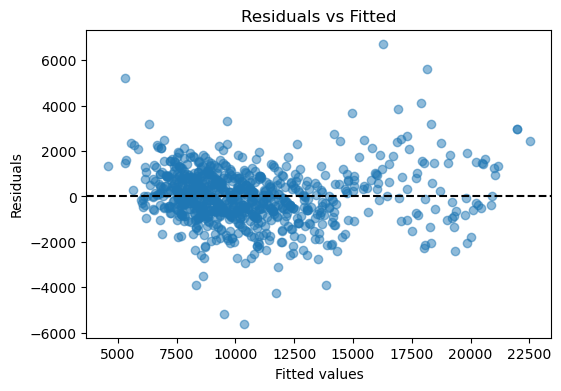

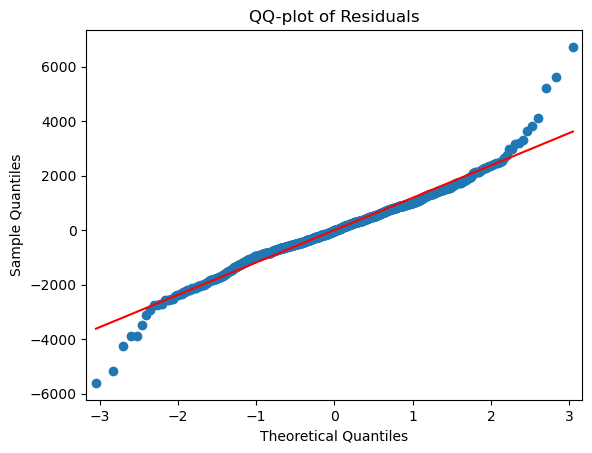


VIF for full model after removing problematic variables
            variable        VIF
0              const  65.614107
1          Age_08_04   2.526412
2                 KM   1.749441
3          Automatic   1.027533
4              Doors   1.102381
5      Quarterly_Tax   1.404929
6      Mfr_Guarantee   1.106168
7   Guarantee_Period   1.194344
8              Airco   1.661111
9    Automatic_airco   1.324750
10         CD_Player   1.407992
11   Powered_Windows   1.506791
12       Sport_Model   1.125694
13           Tow_Bar   1.054292


In [24]:
model_multiple_reg_v2 = LinearRegression().fit(X_train_v2 , y_train_v2)

## want to create a table of coefficients for each predictor variable 
coef_table_v2 = pd.DataFrame({
    "Variable": ["Intercept"] + list(X_train_v2.columns),
    "Coefficient": [model_multiple_reg_v2.intercept_] + list(model_multiple_reg_v2.coef_)
})

coef_table_v2

vif_testing_v2 = sm.OLS(y_train_v2, sm.add_constant(X_train_v2)).fit()
print(vif_testing_v2.summary())
plt.figure(figsize=(6, 4))
plt.scatter(vif_testing_v2.fittedvalues, vif_testing_v2.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()
# QQ plot to assess normality
sm.qqplot(vif_testing_v2.resid, line="s")
plt.title("QQ-plot of Residuals")
plt.show()

# VIF for full model
print("\nVIF for full model after removing problematic variables")
print(vif_table(vif_testing_v2))

In [25]:
## let us train the model using the top variables based on the lowest P-Value 
## create prediction set 
predictors_best_four = ['Age_08_04' , 'Automatic_airco' , 'KM' ,'Quarterly_Tax']
# subset the new train and test data sets
X_train_b4 = train_data[predictors_best_four].copy()
y_train_b4 = train_data['Price'].copy()
X_test_b4 = test_data[predictors_best_four].copy()
y_test_b4 = test_data['Price'].copy()

## create regression model , then create the coef table
model_multiple_reg_b4 = LinearRegression().fit(X_train_b4 , y_train_b4)

## want to create a table of coefficients for each predictor variable 
coef_table_b4 = pd.DataFrame({
    "Variable": ["Intercept"] + list(X_train_b4.columns),
    "Coefficient": [model_multiple_reg_b4.intercept_] + list(model_multiple_reg_b4.coef_)
})

coef_table_b4


,Variable,Coefficient
0,Intercept,17834.078653
1,Age_08_04,-123.078675
2,Automatic_airco,3510.713959
3,KM,-0.019955
4,Quarterly_Tax,10.021819


In [26]:
## check against the test set. 
model_multiple_reg_b4test = LinearRegression().fit(X_test_b4 , y_test_b4)
model_ols_b4train = sm.OLS(y_train_b4 , sm.add_constant(X_train_b4)).fit()
model_ols_b4test = sm.OLS(y_test_b4 , sm.add_constant(X_test_b4)).fit()
## create table that shows the coefficients and P values compare against the test and train sets
my_comp_coef_table = pd.DataFrame({
    "Variable": ["Intercept"] + list(X_train_b4.columns),
    "Coefficient_Train": [model_multiple_reg_b4.intercept_] + list(model_multiple_reg_b4.coef_),
    "Coefficient_Test": [model_multiple_reg_b4test.intercept_] + list(model_multiple_reg_b4test.coef_),
    "p-Value_Train": model_ols_b4train.pvalues.values,
    "p-Value_Test": model_ols_b4test.pvalues.values
})
my_comp_coef_table


,Variable,Coefficient_Train,Coefficient_Test,p-Value_Train,p-Value_Test
0,Intercept,17834.078653,18122.838958,0.000000e+00,2.155688e-273
1,Age_08_04,-123.078675,-125.128372,8.687284e-186,4.022138e-113
2,Automatic_airco,3510.713959,4323.026245,1.555408e-51,4.668194e-42
3,KM,-0.019955,-0.022807,1.254082e-34,1.413329e-24
4,Quarterly_Tax,10.021819,11.935232,4.693340e-15,5.009018e-12


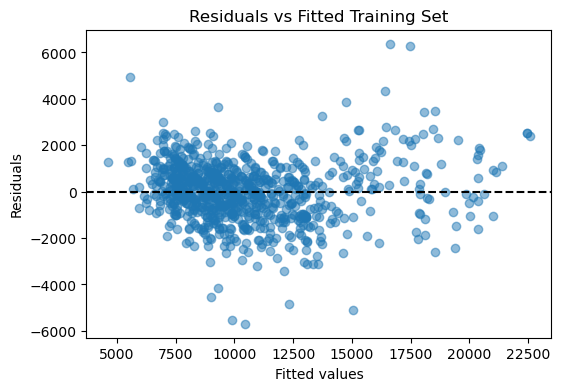

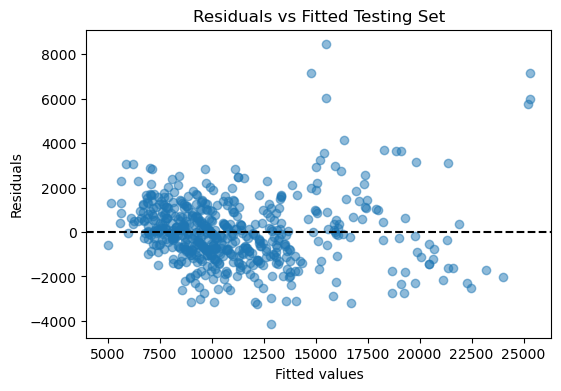

In [27]:
## check the residuals of the 

plt.figure(figsize=(6, 4))
plt.scatter(model_ols_b4train.fittedvalues, model_ols_b4train.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Training Set")
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(model_ols_b4test.fittedvalues, model_ols_b4test.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Testing Set")
plt.show()

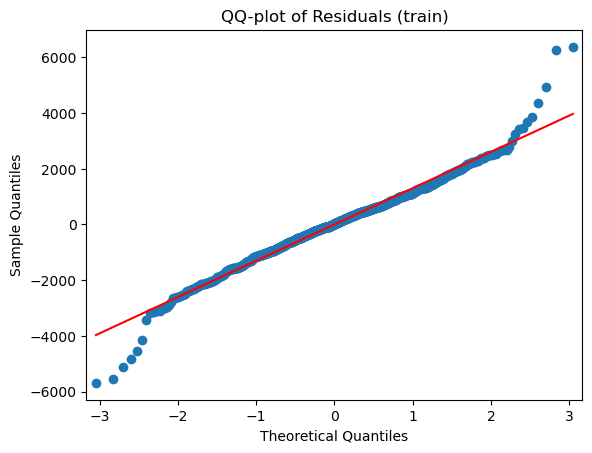

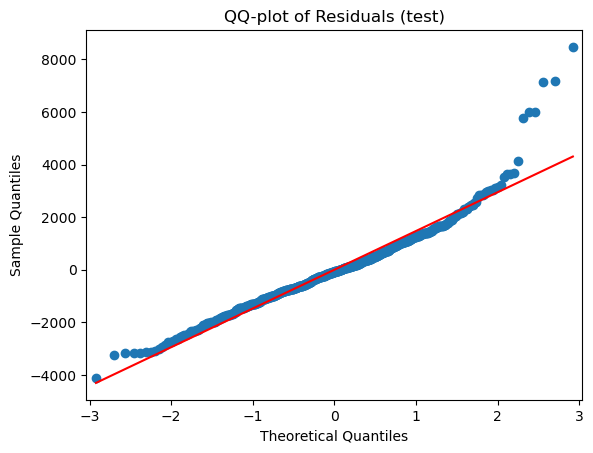


Breusch–Pagan test for heteroskedasticity (train set):
{'LM stat': np.float64(47.06168797513204), 'LM p-value': np.float64(1.4804603895173878e-09), 'F stat': np.float64(12.373420783724649), 'F p-value': np.float64(8.691523403073646e-10)}

Breusch–Pagan test for heteroskedasticity (test set):
{'LM stat': np.float64(75.87876328263806), 'LM p-value': np.float64(1.2987481949947328e-15), 'F stat': np.float64(21.663521750525838), 'F p-value': np.float64(1.1751194962767905e-16)}


In [28]:


## additionally let us explore possible heteroscedasticity between the training and the testing set

model_ols_b4train = sm.OLS(y_train_b4 , sm.add_constant(X_train_b4)).fit()
model_ols_b4test = sm.OLS(y_test_b4 , sm.add_constant(X_test_b4)).fit()
# ---------------------------------------------------------
# Breusch–Pagan test against heteroskedasticity

sm.qqplot(model_ols_b4train.resid, line="s")  # "s" = standardized line (R-like)
plt.title("QQ-plot of Residuals (train)")
plt.show()
sm.qqplot(model_ols_b4test.resid, line="s")  # "s" = standardized line (R-like)
plt.title("QQ-plot of Residuals (test)")
plt.show()

bp_trainset = sms.het_breuschpagan(model_ols_b4train.resid, model_ols_b4train.model.exog)
bp_trainlabels = ["LM stat", "LM p-value", "F stat", "F p-value"]
print("\nBreusch–Pagan test for heteroskedasticity (train set):")
print(dict(zip(bp_trainlabels, bp_trainset)))

bp_testset = sms.het_breuschpagan(model_ols_b4test.resid, model_ols_b4test.model.exog)
bp_testlabels = ["LM stat", "LM p-value", "F stat", "F p-value"]
print("\nBreusch–Pagan test for heteroskedasticity (test set):")
print(dict(zip(bp_testlabels, bp_testset)))


In [32]:
ols_train_robust =model_ols_b4train.get_robustcov_results(cov_type="HC0")
print("\nOLS with robust (HC0) standard errors: training dataset")
print(ols_train_robust.summary())


OLS with robust (HC0) standard errors: training dataset
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     810.6
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          2.69e-289
Time:                        17:31:36   Log-Likelihood:                -7397.6
No. Observations:                 861   AIC:                         1.481e+04
Df Residuals:                     856   BIC:                         1.483e+04
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [31]:
ols_test_robust =model_ols_b4test.get_robustcov_results(cov_type="HC0")
print("\nOLS with robust (HC0) standard errors: testing dataset")
print(ols_test_robust.summary())


OLS with robust (HC0) standard errors: testing dataset
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     431.7
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          6.95e-171
Time:                        17:31:33   Log-Likelihood:                -5010.5
No. Observations:                 575   AIC:                         1.003e+04
Df Residuals:                     570   BIC:                         1.005e+04
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [33]:
## there seems to be a few outliers in the train and test set. To confirm the outliers we can use Cooks D with the cutoff 4/n (where n is the number of observations)
influence_train = model_ols_b4train.get_influence()
## Cooks Distance is the first value of the output 
df_cook_train = pd.DataFrame({'CookD': influence_train.cooks_distance[0]} , index = X_train_b4.index)
## create a cutoff threshold 
cutoff_train = 4 / len(X_train_b4)

outliers_train = df_cook_train[df_cook_train['CookD'] > cutoff_train]

cleaned_X_train_b4 = X_train_b4.drop(outliers_train.index)
cleaned_y_train_b4 = y_train_b4.drop(outliers_train.index)


In [34]:
## there seems to be a few outliers in the train and test set. To confirm the outliers we can use Cooks D with the cutoff 4/n (where n is the number of observations)
influence_test = model_ols_b4test.get_influence()
## Cooks Distance is the first value of the output 
df_cook_test = pd.DataFrame({'CookD': influence_test.cooks_distance[0]} , index = X_test_b4.index)
## create a cutoff threshold 
cutoff_test = 4 / len(X_test_b4)

outliers_test = df_cook_test[df_cook_test['CookD'] > cutoff_test]

cleaned_X_test_b4 = X_test_b4.drop(outliers_test.index)
cleaned_y_test_b4 = y_test_b4.drop(outliers_test.index)

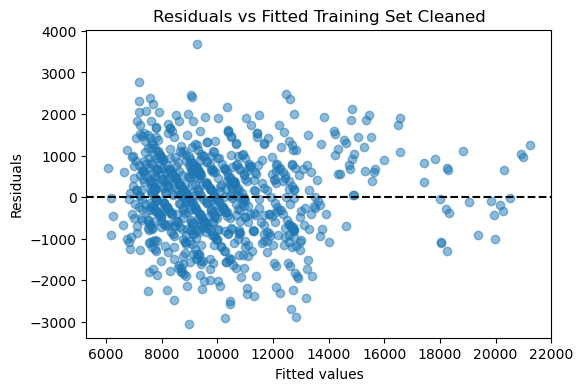

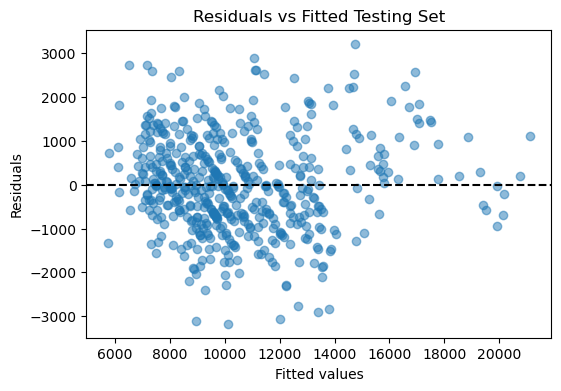

In [35]:
## plot the new ones to show the difference and or if there is an improvement
cleaned_model_multiple_reg_b4train = LinearRegression().fit(cleaned_X_train_b4 , cleaned_y_train_b4)
cleaned_model_multiple_reg_b4test = LinearRegression().fit(cleaned_X_test_b4 , cleaned_y_test_b4)
cleaned_model_ols_b4train = sm.OLS(cleaned_y_train_b4 , sm.add_constant(cleaned_X_train_b4)).fit()
cleaned_model_ols_b4test = sm.OLS(cleaned_y_test_b4 , sm.add_constant(cleaned_X_test_b4)).fit()

plt.figure(figsize=(6, 4))
plt.scatter(cleaned_model_ols_b4train.fittedvalues, cleaned_model_ols_b4train.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Training Set Cleaned")
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(cleaned_model_ols_b4test.fittedvalues, cleaned_model_ols_b4test.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Testing Set")
plt.show()


In [36]:
print(cleaned_model_ols_b4train.summary())
print(cleaned_model_ols_b4test.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1258.
Date:                Mon, 10 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:31:50   Log-Likelihood:                -6578.1
No. Observations:                 789   AIC:                         1.317e+04
Df Residuals:                     784   BIC:                         1.319e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.743e+04    180.703     

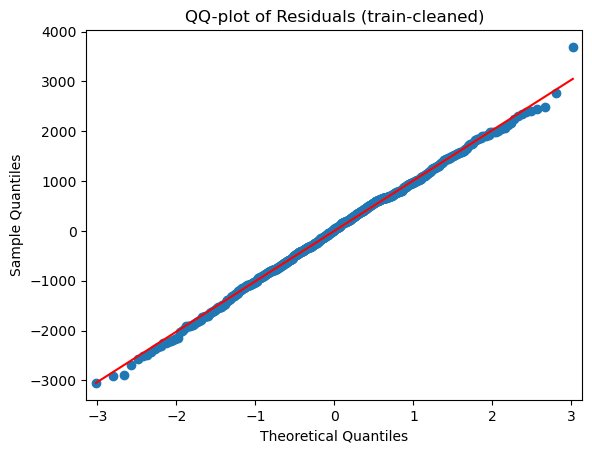

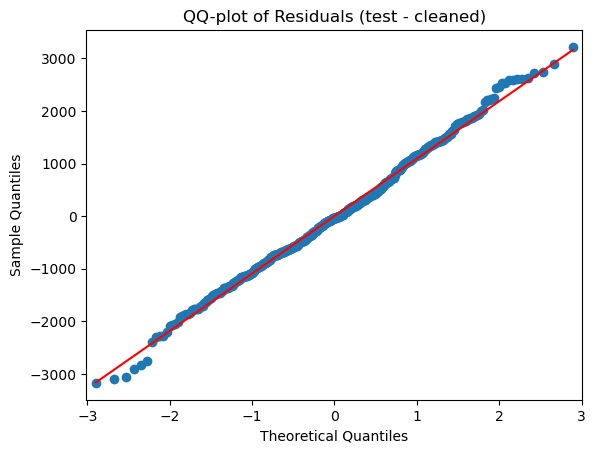


Breusch–Pagan test for heteroskedasticity (train set cleaned):
{'LM stat': np.float64(10.722650235512447), 'LM p-value': np.float64(0.029864392030642676), 'F stat': np.float64(2.700373391049358), 'F p-value': np.float64(0.029629067579877856)}

Breusch–Pagan test for heteroskedasticity (test set cleaned):
{'LM stat': np.float64(16.66373641583435), 'LM p-value': np.float64(0.002246385101199578), 'F stat': np.float64(4.261333471308518), 'F p-value': np.float64(0.002109494601169883)}


In [37]:
sm.qqplot(cleaned_model_ols_b4train.resid, line="s")  # "s" = standardized line (R-like)
plt.title("QQ-plot of Residuals (train-cleaned)")
plt.show()
sm.qqplot(cleaned_model_ols_b4test.resid, line="s")  # "s" = standardized line (R-like)
plt.title("QQ-plot of Residuals (test - cleaned)")
plt.show()

cleaned_bp_trainset = sms.het_breuschpagan(cleaned_model_ols_b4train.resid, cleaned_model_ols_b4train.model.exog)
cleaned_bp_trainlabels = ["LM stat", "LM p-value", "F stat", "F p-value"]
print("\nBreusch–Pagan test for heteroskedasticity (train set cleaned):")
print(dict(zip(cleaned_bp_trainlabels, cleaned_bp_trainset)))

cleaned_bp_testset = sms.het_breuschpagan(cleaned_model_ols_b4test.resid, cleaned_model_ols_b4test.model.exog)
cleaned_bp_testlabels = ["LM stat", "LM p-value", "F stat", "F p-value"]
print("\nBreusch–Pagan test for heteroskedasticity (test set cleaned):")
print(dict(zip(cleaned_bp_testlabels, cleaned_bp_testset)))


In [38]:
cleaned_ols_train_robust =cleaned_model_ols_b4train.get_robustcov_results(cov_type="HC0")
print("\nOLS with robust (HC0) standard errors: cleaned training dataset")
print(cleaned_ols_train_robust.summary())
cleaned_ols_test_robust =cleaned_model_ols_b4test.get_robustcov_results(cov_type="HC0")
print("\nOLS with robust (HC0) standard errors: cleaned testing dataset")
print(cleaned_ols_test_robust.summary())


OLS with robust (HC0) standard errors: cleaned training dataset
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1489.
Date:                Mon, 10 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:39:16   Log-Likelihood:                -6578.1
No. Observations:                 789   AIC:                         1.317e+04
Df Residuals:                     784   BIC:                         1.319e+04
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [ ]:
## it is interesting to note that R^2 increased by 0.01 but condition number increased 

In [ ]:
cleaned_my_comp_coef_table = pd.DataFrame({
    "Variable": ["Intercept"] + list(cleaned_X_train_b4.columns),
    "Coefficient_Train": [cleaned_model_multiple_reg_b4train.intercept_] + list(cleaned_model_multiple_reg_b4train.coef_),
    "Coefficient_Test": [cleaned_model_multiple_reg_b4test.intercept_] + list(cleaned_model_multiple_reg_b4test.coef_),
    "p-Value_Train": cleaned_model_ols_b4train.pvalues.values,
    "p-Value_Test": cleaned_model_ols_b4test.pvalues.values
})
cleaned_my_comp_coef_table

,Variable,Coefficient_Train,Coefficient_Test,p-Value_Train,p-Value_Test
0,Intercept,17431.095451,17805.570617,0.000000e+00,2.995980e-301
1,Age_08_04,-115.739674,-123.048314,2.607395e-200,1.096919e-142
2,Automatic_airco,4063.792314,4166.091240,1.838164e-55,7.626393e-29
3,KM,-0.015741,-0.017677,2.356812e-28,3.995856e-22
4,Quarterly_Tax,5.824853,9.754182,1.984890e-06,2.836637e-09


statsmodel robust errors
R-squared: 0.87
RMSE: 1092.16

ski-kit learn
R-squared: 0.87
RMSE: 1092.16


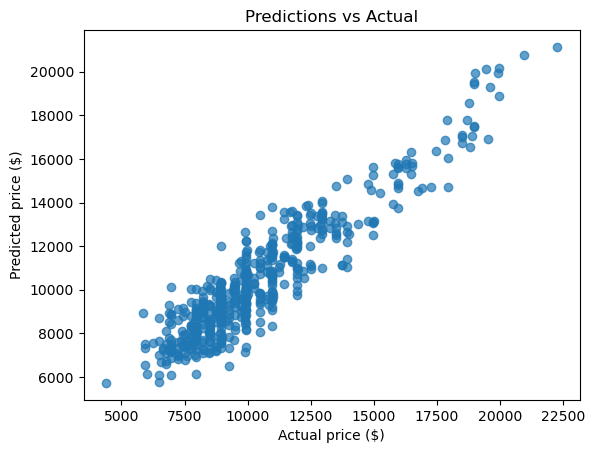

In [41]:
### Step 6: Predictions and Final Evaluation ----

# scikit-learn
cleaned_pred_b4 = cleaned_ols_test_robust.predict(sm.add_constant(cleaned_X_test_b4[predictors_best_four]))

r2_cleaned_b4 = r2_score(cleaned_y_test_b4, cleaned_pred_b4)
rmse_cleaned_b4 = np.sqrt(mean_squared_error(cleaned_y_test_b4, cleaned_pred_b4))

print("statsmodel robust errors")
print(f"R-squared: {round(r2_cleaned_b4, 2)}")
print(f"RMSE: {round(rmse_cleaned_b4, 2)}")

cleaned_pred_b4_sl = cleaned_model_multiple_reg_b4test.predict((cleaned_X_test_b4[predictors_best_four]))

r2_sm = r2_score(cleaned_y_test_b4, cleaned_pred_b4_sl)
rmse_sm = np.sqrt(mean_squared_error(cleaned_y_test_b4, cleaned_pred_b4_sl))

print("\nski-kit learn")
print(f"R-squared: {round(r2_sm, 2)}")
print(f"RMSE: {round(rmse_sm, 2)}")

# Scatter Plot of Predictions
plt.scatter(cleaned_y_test_b4, cleaned_pred_b4_sl, alpha=0.7)
plt.xlabel("Actual price ($)")
plt.ylabel("Predicted price ($)")
plt.title("Predictions vs Actual")
plt.show()


In [49]:
## need to create foward/ backwards and stepwise feature selection 

## start with forward

sfs_forward = SFS(LinearRegression(), # type of model
                  k_features=(1, 4), # will find between 1 and 4 features
                  forward=True, # search direction (backwards if False)
                  floating=False, # controls stepwise vs. one direction
                  scoring='neg_root_mean_squared_error', # find max RMSE
                  cv=5) # how many random subsets of data to test
sfs_forward = sfs_forward.fit(X_train, y_train)
best_forward_subset = sfs_forward.subsets_[1]
for v in sfs_forward.subsets_.values():
    if v['avg_score'] > best_forward_subset['avg_score']:
        best_forward_subset = v


print(f'Best score: {- best_forward_subset["avg_score"]:.2f}')
print(f'Best subset (indices): {best_forward_subset["feature_idx"]}')
print(f'Best subset (names): {best_forward_subset["feature_names"]}')


Best score: 1313.24
Best subset (indices): (0, 1, 8, 12)
Best subset (names): ('Age_08_04', 'KM', 'Quarterly_Tax', 'Automatic_airco')


In [57]:
## need to create foward/ backwards and stepwise feature selection 


sfs_backward = SFS(LinearRegression(), # type of model
                  k_features=(1, 4),
                  forward=False, # search direction (backwards if False)
                  floating=False, # controls stepwise vs. one direction
                  scoring='neg_root_mean_squared_error', # find max RMSE
                  cv=5) # how many random subsets of data to test
sfs_backward = sfs_backward.fit(X_train, y_train)
best_backward_subset = sfs_backward.subsets_[1]
for v in sfs_backward.subsets_.values():
    if v['avg_score'] > best_backward_subset['avg_score']:
        best_bacward_subset = v


print(f'Best score: {- best_backward_subset["avg_score"]:.2f}')
print(f'Best subset (indices): {best_backward_subset["feature_idx"]}')
print(f'Best subset (names): {best_backward_subset["feature_names"]}')


Best score: 1614.61
Best subset (indices): (0,)
Best subset (names): ('Age_08_04',)


In [63]:
# Stepwise selection
sfs_stepwise = SFS(LinearRegression(),
            k_features=(1, 4),
            forward=True, floating=True,
            cv=5, scoring='neg_root_mean_squared_error',
            n_jobs=-1)

sfs_stepwise = sfs_stepwise.fit(X_train, y_train)

best_subset = sfs_stepwise.subsets_[4]
for v in sfs_stepwise.subsets_.values():
    if v['avg_score'] > best_subset['avg_score']:
        best_subset = v

print(f"Best accuracy score: {- best_subset['avg_score']:.2f}")
print(f"Best subset (indices): {best_subset['feature_idx']}")
print(f"Best subset (corresponding names):\n{best_subset['feature_names']}")

Best accuracy score: 1313.24
Best subset (indices): (0, 1, 8, 12)
Best subset (corresponding names):
('Age_08_04', 'KM', 'Quarterly_Tax', 'Automatic_airco')


In [ ]:
## did this a little out of order, but pretty much best is the same as the best 4 we looked at earlier 
## need to do a little cleaning up

